In [118]:
import numpy as np
import os
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
import sys
sys.path.append("../utils")
sys.path.append("../")
import utils.util_lookup_table

In [119]:
[f[:-4] for f in os.listdir("./results") if "QPSK" in f]


['QPSK_neural_vs_clone',
 'QPSK_neural_vs_selfalien',
 'QPSK_neural_vs_poly',
 'QPSK_neural_vs_classic',
 'QPSK_poly_vs_clone']

dict_keys(['convergence_for', '5db_off', 'test_SNR_dbs', 'iterations', 'BER_mid', 'final_bers', 'symbols_sent', 'BER_high', '3db_off', 'num_trials', 'BER_low'])
dict_keys(['convergence_for', '5db_off', 'test_SNR_dbs', 'iterations', 'BER_mid', 'final_bers', 'symbols_sent', 'BER_high', '3db_off', 'num_trials', 'BER_low'])
dict_keys(['convergence_for', '5db_off', 'test_SNR_dbs', 'iterations', 'BER_mid', 'final_bers', 'symbols_sent', 'BER_high', '3db_off', 'num_trials', 'BER_low'])
dict_keys(['convergence_for', '5db_off', 'test_SNR_dbs', 'iterations', 'BER_mid', 'final_bers', 'symbols_sent', 'BER_high', '3db_off', 'num_trials', 'BER_low'])
dict_keys(['convergence_for', '5db_off', 'test_SNR_dbs', 'iterations', 'BER_mid', 'final_bers', 'symbols_sent', 'BER_high', '3db_off', 'num_trials', 'BER_low'])


/Users/caryn/anaconda/envs/tensorflow/lib/python3.5/site-packages/matplotlib/axes/_base.py:1376: UserWarning: aspect is not supported for Axes with xscale=linear, yscale=log
  'yscale=%s' % (xscale, yscale))


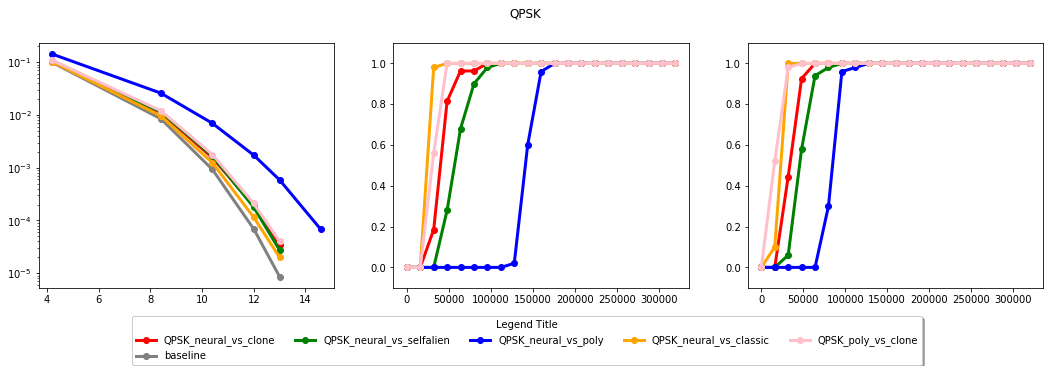

In [123]:
br = utils.util_lookup_table.BER_lookup_table()
color = {
 'QPSK_neural_vs_clone':"r",
 'QPSK_neural_vs_selfalien':'g',
 'QPSK_neural_vs_poly':'b',
 'QPSK_neural_vs_classic':"orange",
 'QPSK_poly_vs_clone':"pink",
}
fig,(ber, db3, db5) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(6*3)
# for ax in axes:
#     ax.set_aspect('equal', adjustable="datalim")
# (ber, db3, db5) = axes
fig.suptitle('QPSK')
baseline=False
for experiment_name in [f for f in os.listdir("./results/") if 'QPSK' in f]:
    f = os.path.join("./results", experiment_name)
    experiment_name = experiment_name[:-4]
    experiment_dict = np.load(f, allow_pickle=True).item()
    mid_ber = sorted(experiment_dict.keys())[1]
    r = experiment_dict[mid_ber]
    print(r.keys())
#     print(r['test_SNR_dbs'], np.fliplr(np.array(r['BER_mid']).reshape((1, 6))))
    ber.plot( np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0], 
              np.fliplr(np.array(r['BER_mid']).reshape((1, 6)))[0],'o-b', 
              label=experiment_name, color = color[experiment_name], linewidth = 3)
    db3.plot(r['symbols_sent'], r['3db_off'],'o-b',  label=experiment_name, color = color[experiment_name], linewidth = 3)
    db5.plot(r['symbols_sent'], r['5db_off'], 'o-b',label=experiment_name, color = color[experiment_name], linewidth = 3)
    if not baseline:
        ber_baseline = [br.get_optimal_BER_roundtrip(test_SNR_db, 2) 
                        for test_SNR_db in np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0]]
        ber.plot( np.fliplr(np.array(r['test_SNR_dbs']).reshape((1, 6)))[0], 
              ber_baseline,'o-b',
              label="baseline", color ='gray', linewidth = 3)
        baseline=True
ber.set_aspect('equal')
ber.set_yscale('log')
# ber.legend()

db3.set_ylim(top=1.1, bottom=-0.1)
db5.set_ylim(top=1.1, bottom=-0.1)
# db5.set_aspect('equal')
handles, labels = ber.get_legend_handles_labels()



# Put a legend below current axis
fig.legend(handles,                # The line objects
           labels,
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title",  # Title for the legend
           loc='lower center',
           fancybox=True, shadow=True, ncol=5
           )
# fig.tight_layout()
fig.subplots_adjust(bottom=0.2)  
plt.show()